# Cardio Good Fitness Project

## Objective

__Cardio Good Fitness__ is a retail store specializing in treadmills.<br/>
This project aims at analyzing the data from _Cardio Good Fitness_ in order to generate the insights and recommendations that will help the company to target new customers.<br/> 
In order to do this we will,
1. Generate a customer profile for a product
2. Perform univariate and multivariate analyses
3. Generate other insights and recommendations to help the company target new customers

In [1]:
# Course: Fundamentals of AIML
# Project: Cardio Good Fitness Project 
# Student: Sameer Girolkar
# Date: Sept 22, 2021


In [2]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# make the graphs look nicer
sns.set(color_codes=True) 
sns.set_style('darkgrid')
# light palette for Pivot tables
cm = sns.light_palette("lightblue", as_cmap=True)
sns.set(
    rc = {
        'figure.figsize':(15,15),
        'axes.titlesize':'30',
        'xtick.labelsize':'20',
        'ytick.labelsize':'20'
    }
)

# actually display the graphs instead of generating only the object
%matplotlib inline 

## Descriptive Analysis: overall data

In [4]:
# read the data
cgf_data = pd.read_csv('CardioGoodFitness.csv')

In [5]:
# take a look at the sample data
cgf_data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
162,TM798,28,Female,18,Partnered,6,5,92131,180
19,TM195,23,Female,15,Partnered,2,2,34110,38
176,TM798,42,Male,18,Single,5,4,89641,200
64,TM195,35,Female,16,Partnered,3,3,60261,94
55,TM195,31,Male,14,Partnered,2,2,54576,47


In [6]:
# get the information about the data
cgf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
cgf_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


__Observation:__
1. None of the data is missing
2. Education is provided as a number. It will be better if we create meaningful labels.
3. It will be helpful if Product, Gender, Fitness and MaritalStatus are converted to category
4. Univariate analysis of Age, Education and Income can help us create target groups 

## Univariate Analysis

### Histogram: Overall Data

Histograms will help us confirm the same observations above.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

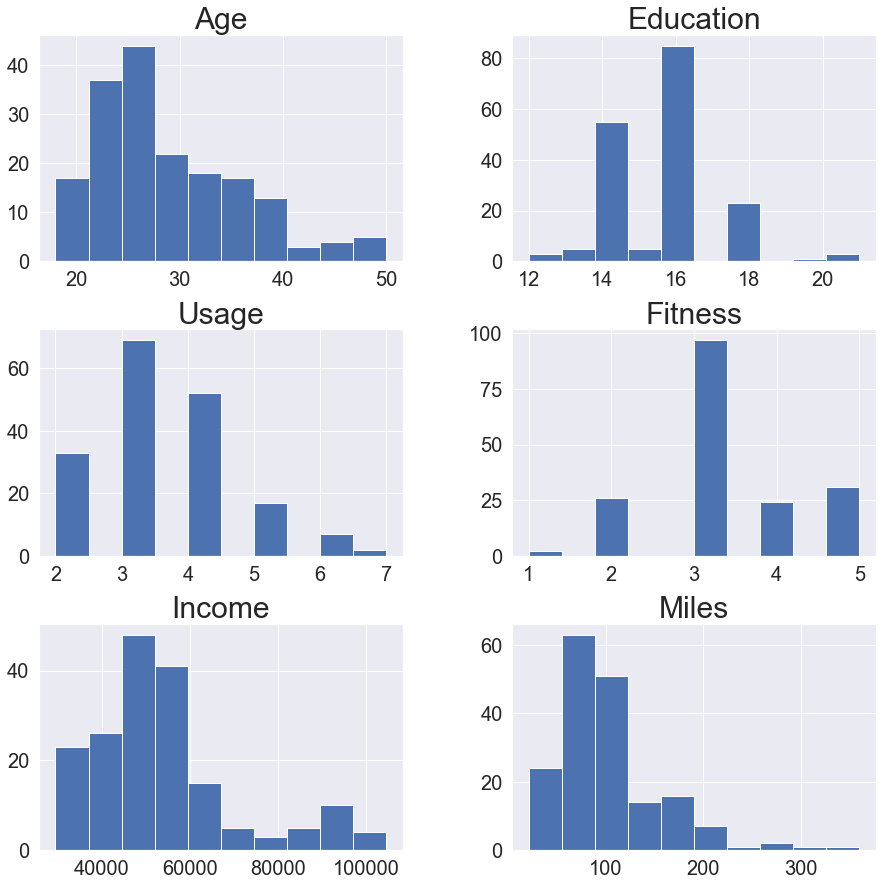

In [8]:
# Generate the Histogram for the entire data
cgf_data.hist(figsize=(15, 15))

__Observations:__
1. Prominent Age Groups are 20s, 30s, 40s & 50
2. Prominent Income Groups are 20K-40K, 41K-60K, 61K-80K, 80K-100K

In [9]:
# generate Education Levels based on the no of years of education
def get_edu_lavel(no_of_yrs):
    if no_of_yrs in range(0, 13):
        return "Highschool"
    elif no_of_yrs in range(13, 15):
        return "Associate"
    elif no_of_yrs in range(15, 17):
        return "Bachelor"
    else:
        return "Master"
cgf_data["EducationLevel"] = cgf_data["Education"].map(get_edu_lavel)

# generate Age groups based on the age
age_labels = ["{0}s".format(i) for i in range(20, 60, 10)]
cgf_data["AgeGroup"] = pd.cut(cgf_data.Age, range(20, 70, 10), right=False, labels=age_labels)

# generate income groups
income_labels = ["{0}K to {1}K".format(int(i/1000), int((i/1000) + 19)) for i in range(20000, 120000, 20000)]
cgf_data["IncomeGroup"] = pd.cut(cgf_data.Income, range(20000, 140000, 20000), right=False, labels=income_labels)

# generate Miles groups
mile_labels = ["{0} to {1} Miles".format(i, int(i + 49)) for i in range(0, 400, 50)]
cgf_data["MilesGroup"] = pd.cut(cgf_data.Miles, range(0, 450, 50), right=False, labels=mile_labels)


# Convert object types to category
cgf_data["Product"] = cgf_data["Product"].astype("category")
cgf_data["Gender"] = cgf_data["Gender"].astype("category")
cgf_data["MaritalStatus"] = cgf_data["MaritalStatus"].astype("category")
cgf_data["EducationLevel"] = cgf_data["EducationLevel"].astype("category")
cgf_data["AgeGroup"] = cgf_data["AgeGroup"].astype("category")
cgf_data["Fitness"] = cgf_data["Fitness"].astype("category")
cgf_data["UsageGroup"] = cgf_data["Usage"].astype("category")


cgf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    category
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   EducationLevel  180 non-null    category
 10  AgeGroup        175 non-null    category
 11  IncomeGroup     180 non-null    category
 12  MilesGroup      180 non-null    category
 13  UsageGroup      180 non-null    category
dtypes: category(9), int64(5)
memory usage: 10.5 KB


In [10]:
# get the basic statastical information about the numeric columns
cgf_data.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


__Observations:__
1. Customers are between the age of 18 to 50
2. Most of the customers are under the age of 35
3. Customers expect to use the treadmill between 2 to 7 hrs per week
4. Customers expect to run between 21 to 360 miles
5. Customer income is in the range of 29562 to 104581

In [11]:
# get the basic statastical information about the categorical columns
cgf_data.describe(include=["category"])

,Product,Gender,MaritalStatus,Fitness,EducationLevel,AgeGroup,IncomeGroup,MilesGroup,UsageGroup
count,180,180,180,180,180,175,180,180,180
unique,3,2,2,5,4,4,5,8,6
top,TM195,Male,Partnered,3,Bachelor,20s,40K to 59K,50 to 99 Miles,3
freq,80,104,107,97,90,108,106,90,69


__Observations:__
1. There are 3 different products
2. Most sold product is TM195
3. There are more male customers than female
4. More customers are partnered than single
5. Most number of customers are in their 20s
6. Most number of customers have Bachelor lever education
7. Most customers asses their fitness level at 3

## Descriptive Analysis: customer data for each product

In [12]:
# Group data by product
for product, prod_cust_df in cgf_data.groupby(by="Product"):
    print("\n\n{}:\n".format(product))
    print(prod_cust_df.describe())
    print("\n")
    print(prod_cust_df.describe(include=["category"]))



TM195:

             Age  Education      Usage       Income       Miles
count  80.000000  80.000000  80.000000     80.00000   80.000000
mean   28.550000  15.037500   3.087500  46418.02500   82.787500
std     7.221452   1.216383   0.782624   9075.78319   28.874102
min    18.000000  12.000000   2.000000  29562.00000   38.000000
25%    23.000000  14.000000   3.000000  38658.00000   66.000000
50%    26.000000  16.000000   3.000000  46617.00000   85.000000
75%    33.000000  16.000000   4.000000  53439.00000   94.000000
max    50.000000  18.000000   5.000000  68220.00000  188.000000


       Product  Gender MaritalStatus  Fitness EducationLevel AgeGroup  \
count       80      80            80       80             80       76   
unique       1       2             2        5              4        4   
top      TM195  Female     Partnered        3       Bachelor      20s   
freq        80      40            48       54             43       49   

       IncomeGroup      MilesGroup  UsageGroup

__Observations__
1. Number of products sold by model
    1. TM195 - 80
    2. TM498 - 60
    3. TM798 - 40
2. Gender:
    1. For models TM195 and TM498, number of Male customers is almost equal to Female customers
    2. For model TM798 a much higher number of customers are Male
3. MaritalStatus:
    1. For all the models more number of customers are Partnered than Single
4. Fitness:
    1. For model TM195, maximum number of customers assessed their fitness level as 3
    2. For model TM498, maximum number of customers assessed their fitness level as 4
    3. For model TM798, maximum number of customers assessed their fitness level as 5
5. EducationLevel:
    1. For models TM195 and TM498, highest number of customers are Bachelors
    2. For model TM798, highest number of customers are Masters
6. AgeGroup:
    1. For all the models most number of customers are in their 20s
7. Usage:
    1. For models TM195 and TM498, usage range is 2 to 5
    2. For model TM798, usage range is 3 to 7
8. Income:
    1. For model TM195, income range is 29562 - 68220
    2. For model TM498, income range is 31836 - 67083
    3. For model TM798, income range is 48556 - 104581


## Bivariate Analysis

### Histogram: Per product

### TM195

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Miles'}>, <AxesSubplot:>]],
      dtype=object)

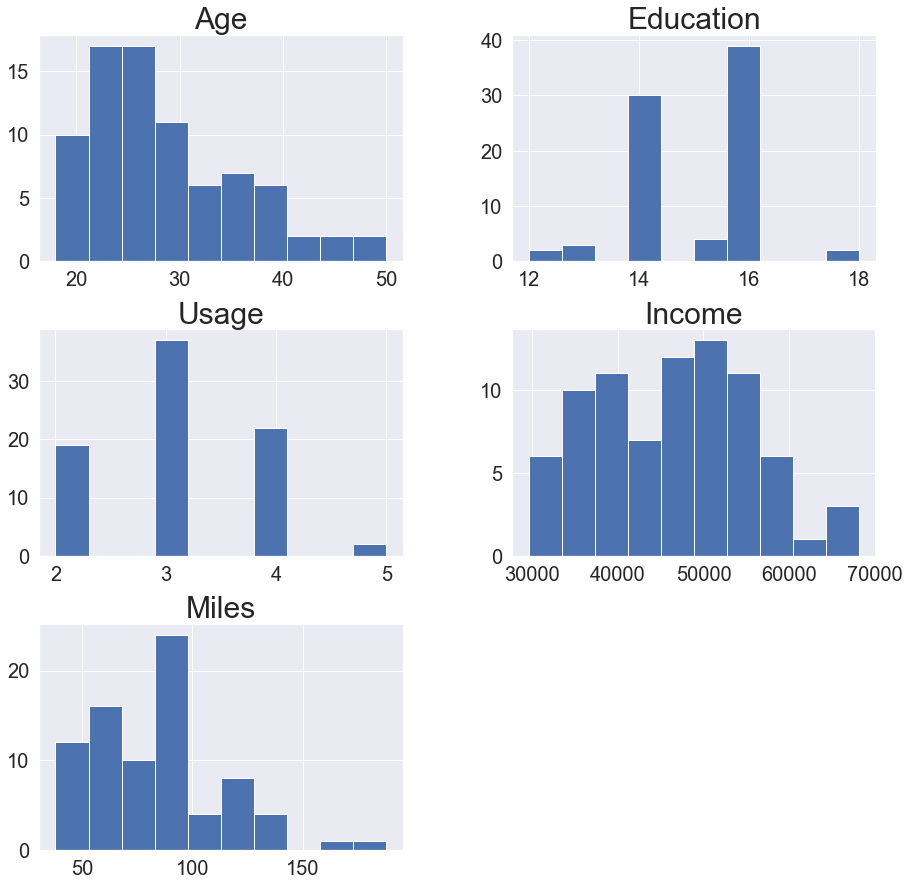

In [13]:
# Generate the Histogram for TM195 Model
TM195_df = cgf_data[cgf_data["Product"] == "TM195"]
TM195_df.hist(figsize=(15, 15))

### TM498

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Miles'}>, <AxesSubplot:>]],
      dtype=object)

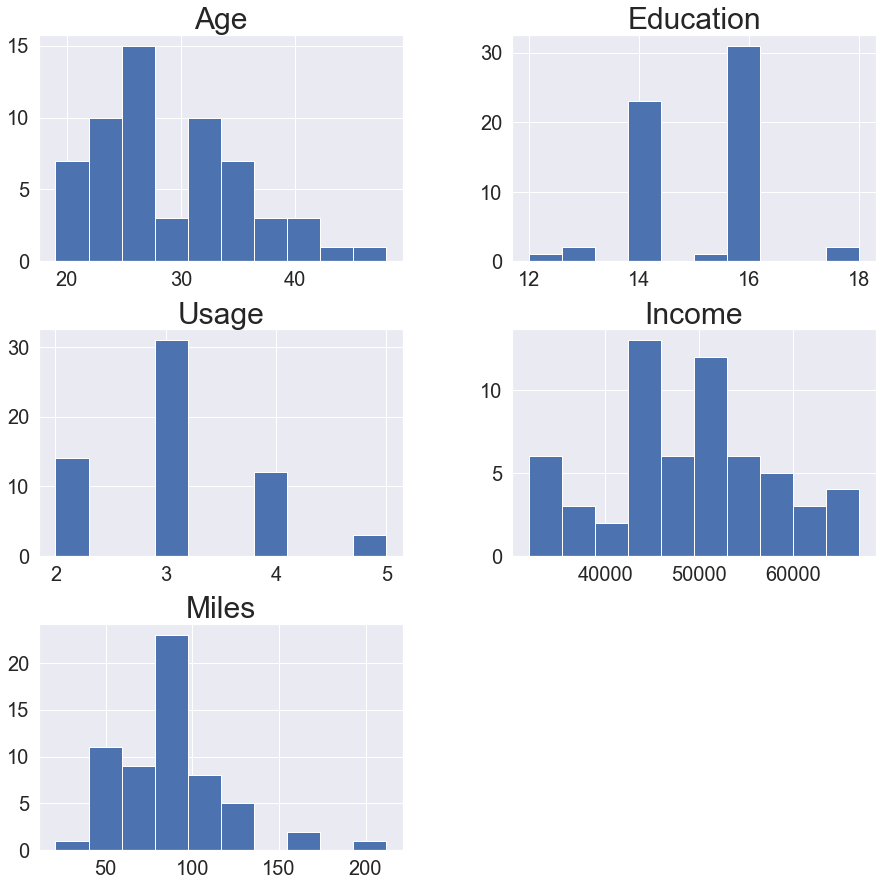

In [14]:
# Generate the Histogram for TM498 Model
TM498_df = cgf_data[cgf_data["Product"] == "TM498"]
TM498_df.hist(figsize=(15, 15))

### TM798

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Miles'}>, <AxesSubplot:>]],
      dtype=object)

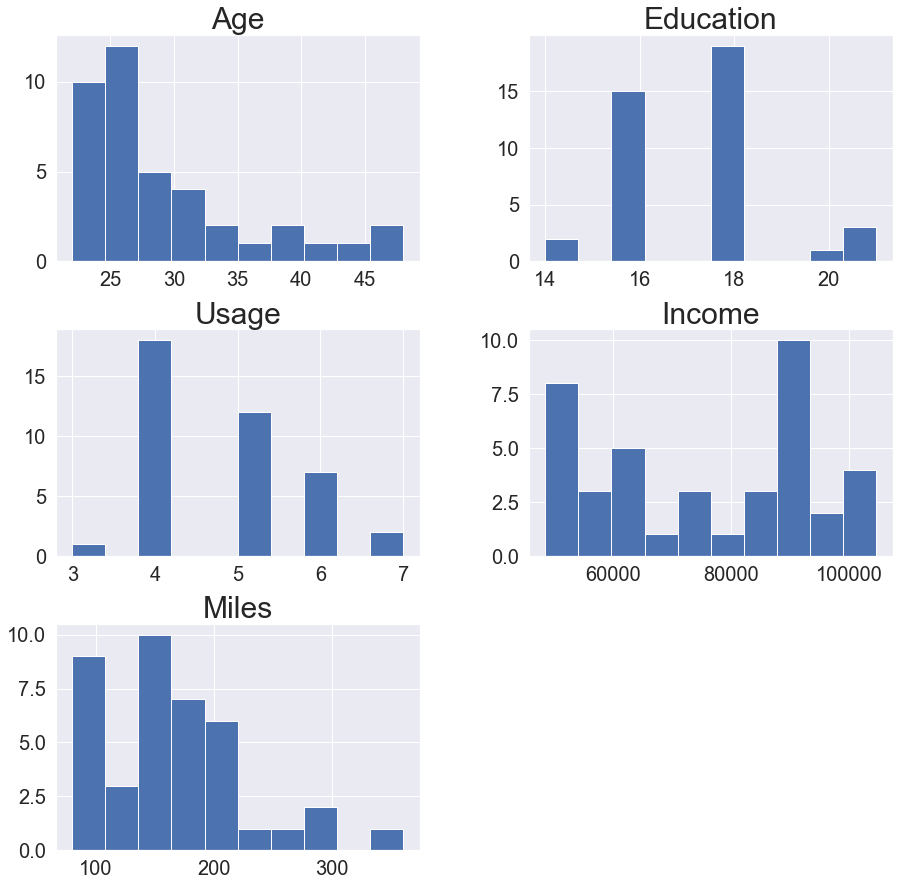

In [15]:
# Generate the Histogram for TM798 Model
TM798_df = cgf_data[cgf_data["Product"] == "TM798"]
TM798_df.hist(figsize=(15, 15))

__Observations:__
1. Customers who bought TM798 expected to put more miles compared to the other two models
2. Customers who bought TM798 expected to use the treadmill for more number of hrs per week compared to the customers of other two models
3. Income range for for the customers who bought TM798 looks higher compared to the other two models
4. Distribution of Age, Education, Usage, Income and Miles look similar for TM195 and TM498 customers. Whereas it looks a little different for the customers of TM798 

In [16]:

# create a pivot table for customers based on their IncomeGroup
cgf_data.pivot_table(
    "Age",
    columns=["IncomeGroup"],
    index="Product",
    aggfunc=len,
    fill_value=0,
).style.background_gradient(cmap=cm)

IncomeGroup,20K to 39K,40K to 59K,60K to 79K,80K to 99K,100K to 119K
Product,,,,,
TM195,23,51,6,0,0
TM498,9,44,7,0,0
TM798,0,11,10,16,3


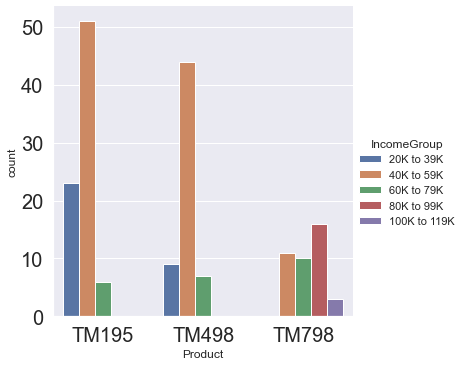

In [17]:
# catplot by Product & IncomeGroup
sns.catplot(data=cgf_data, x="Product", hue="IncomeGroup", kind="count")

__Observations:__
1. Customers with income above 75K did not buy TM195 or TM498
2. More number of customers in the income group 25K to 50K bought TM195

## Multivariate Analysis

In [18]:
# create a pivot table for customers based on their Gender, MaritalStatus 
cgf_data.pivot_table(
    "Age",
    columns=["Gender", "MaritalStatus", ],
    index="Product",
    aggfunc=len,
    fill_value=0,
).style.background_gradient(cmap=cm)

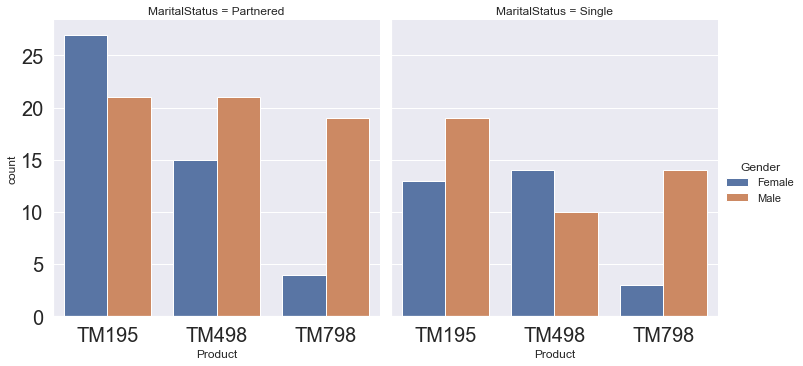

In [19]:
# catplot by Product, Gender and MaritalStatus
sns.catplot(data=cgf_data, x="Product", hue="Gender", col="MaritalStatus", kind="count")

__Observation:__
1. Less number of females have bought TM798. We may infer females are less likely to buy TM798
2. MaritalStatus combined with Gender does not show any clear inclination toward buying a specific model 

In [20]:
# create a pivot table for customers based on their Gender, AgeGroup 
cgf_data.pivot_table(
    "Age",
    columns=["Gender", "AgeGroup", ],
    index="Product",
    aggfunc=len,
    fill_value=0,
).style.background_gradient(cmap=cm)

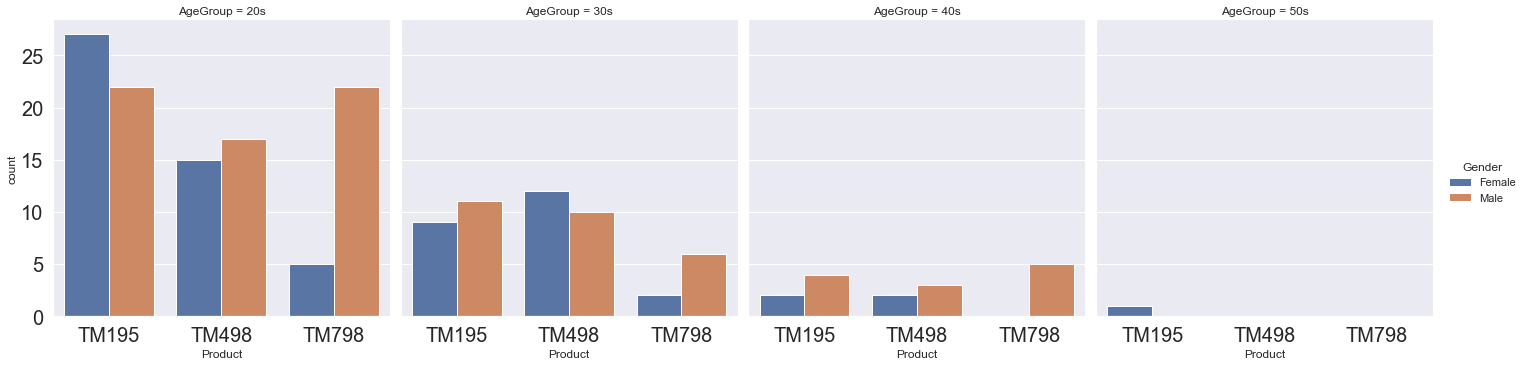

In [21]:
# catplot by Product, Gender and AgeGroup
sns.catplot(data=cgf_data, x="Product", hue="Gender", col="AgeGroup", kind="count")

__Observations:__
1. More number of customers are in their 20s
2. Very few customers are above 40. Specially so about Females above 40.

In [22]:
# create a pivot table for customers based on their AgeGroup & Fitness
cgf_data.pivot_table(
    "Age",
    columns=["AgeGroup", "Fitness"],
    index="Product",
    aggfunc=len,
    fill_value=0,
).style.background_gradient(cmap=cm)


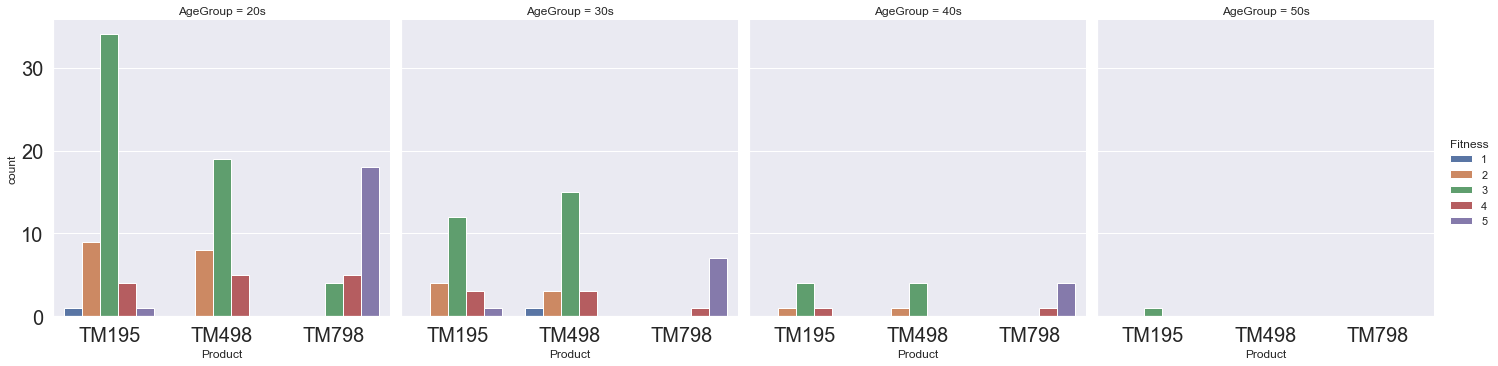

In [23]:
# catplot by Product, Gender and AgeGroup
sns.catplot(data=cgf_data, x="Product", hue="Fitness", col="AgeGroup", kind="count")

__Observations__:
1. Most customers of TM798 have fitness score of 5


In [24]:
# create a pivot table for customers based on their AgeGroup & MilesGroup
cgf_data.pivot_table(
    "Age",
    columns=["MilesGroup"],
    index=["Product", "AgeGroup"],
    aggfunc=len,
    fill_value=0,
).style.background_gradient(cmap=cm)


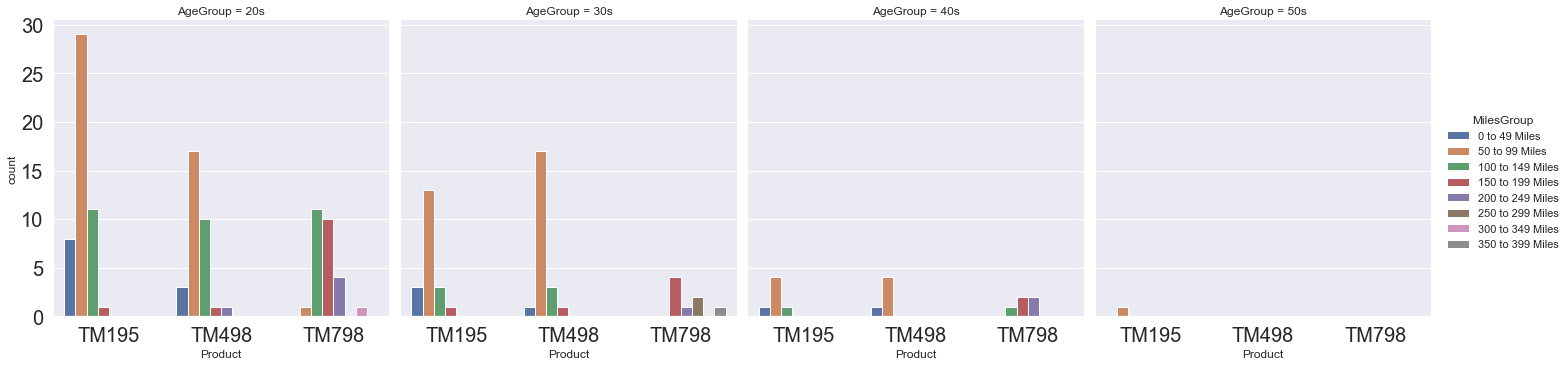

In [25]:
# catplot by Product, Gender and AgeGroup
sns.catplot(data=cgf_data, x="Product", hue="MilesGroup", col="AgeGroup", kind="count")

__Observations:__
1. Most number of users intend to put 50 to 99 Miles
2. Customers who bought TM789 intend to put much higher number of miles. Specially so if they are in their 20s.

### Correlation between category variables for each product

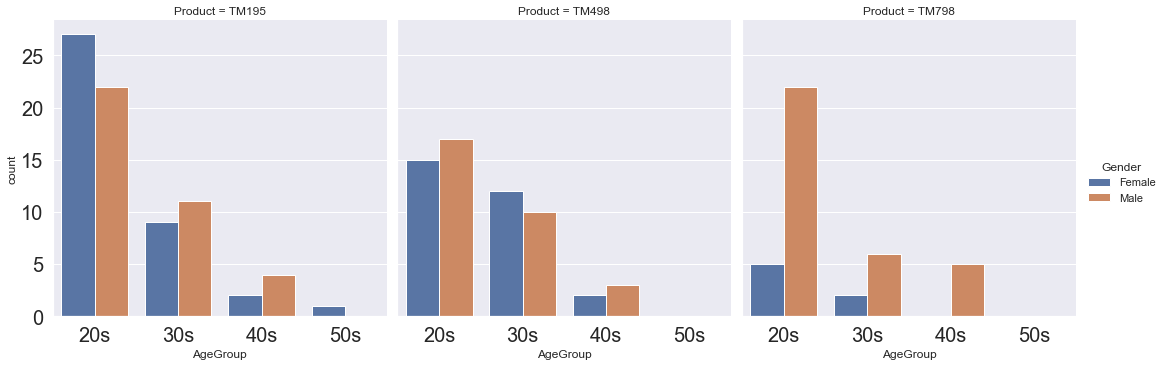

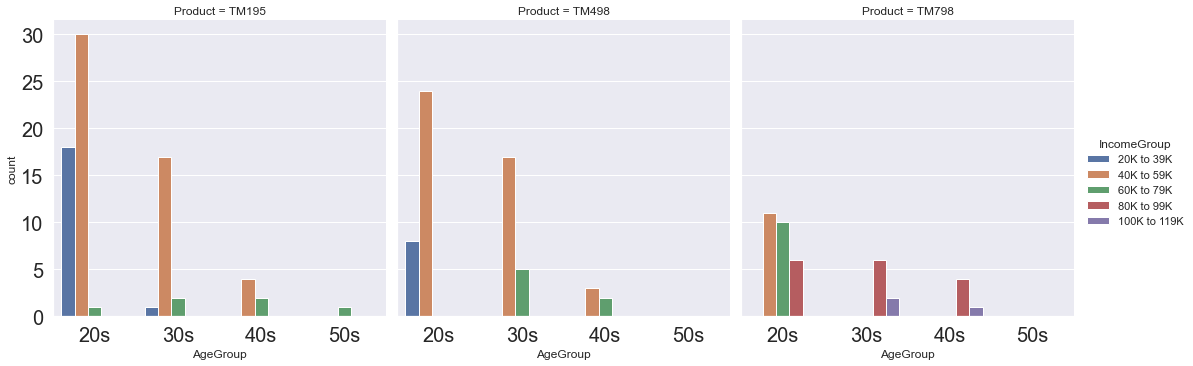

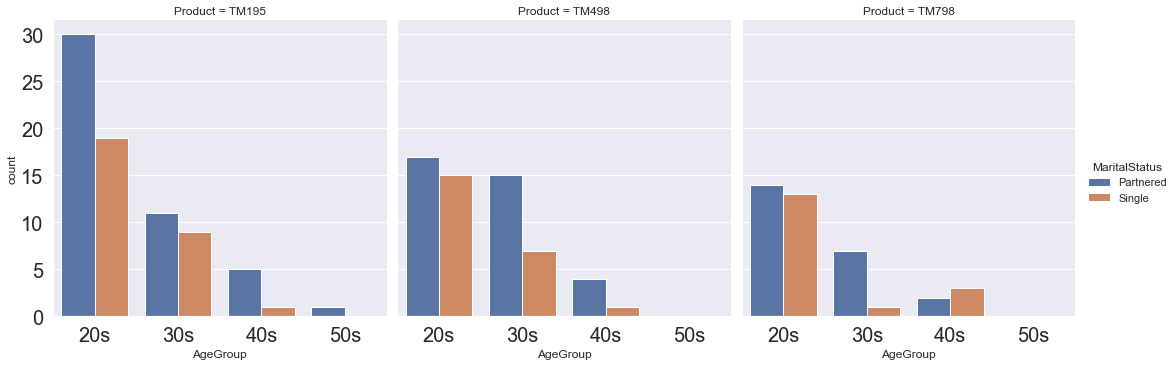

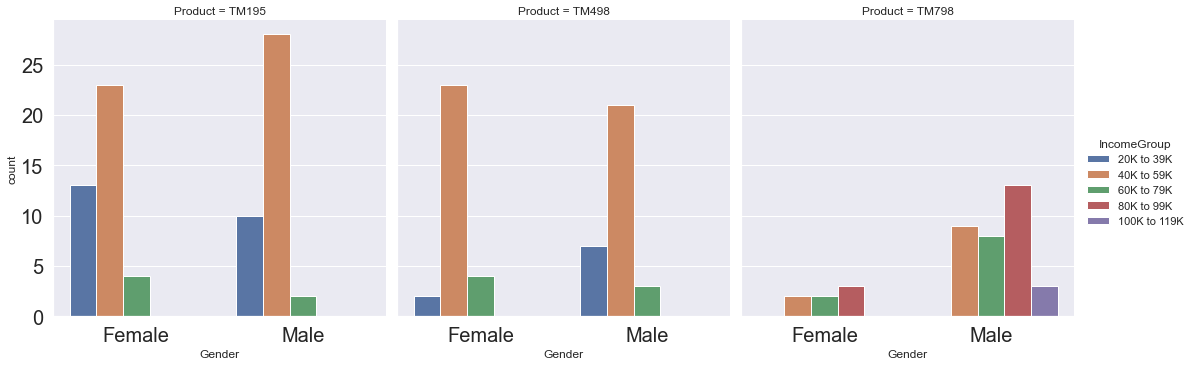

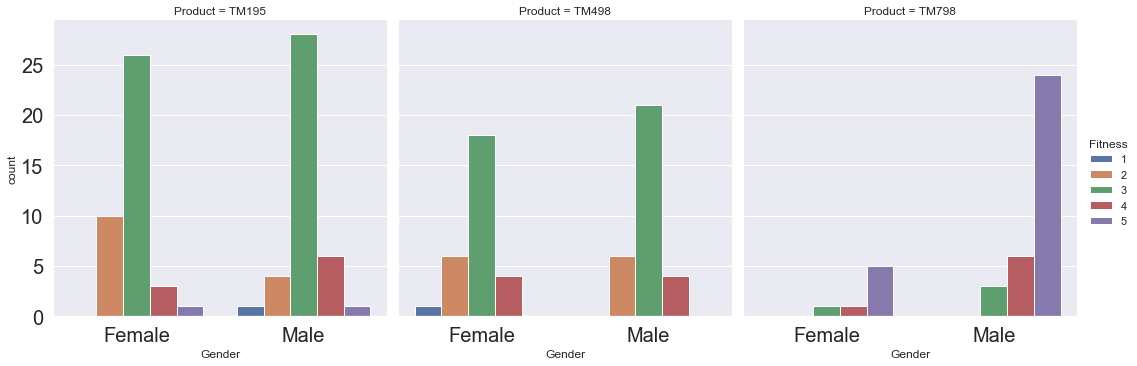

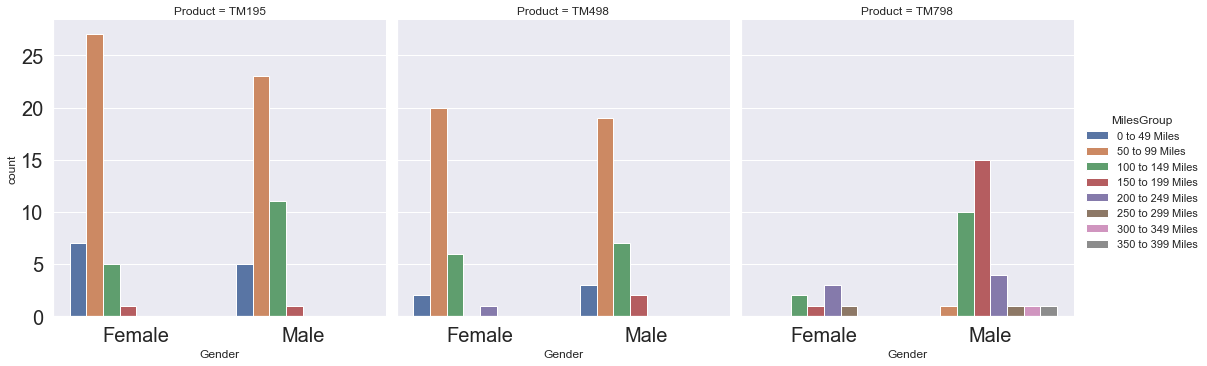

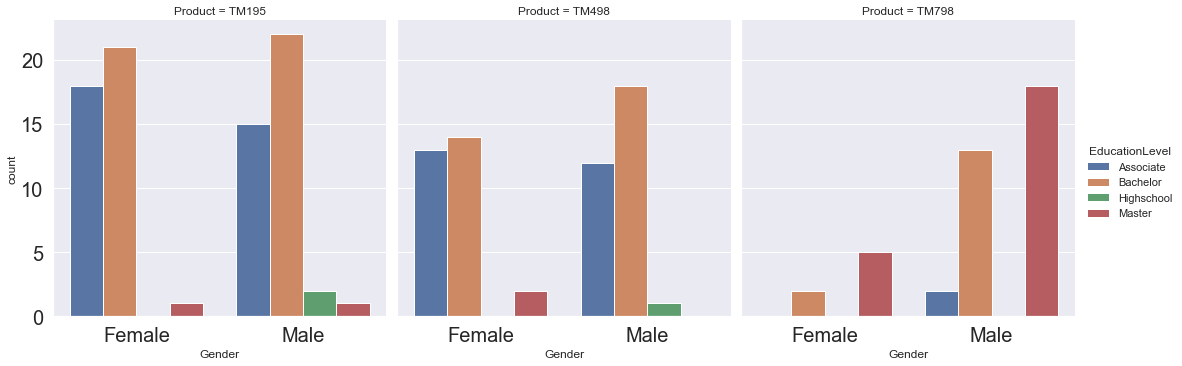

In [26]:
# catplot by Product, Gender and IncomeGroup
sns.catplot(data=cgf_data, x="AgeGroup", hue="Gender", col="Product", kind="count")
sns.catplot(data=cgf_data, x="AgeGroup", hue="IncomeGroup", col="Product", kind="count")
sns.catplot(data=cgf_data, x="AgeGroup", hue="MaritalStatus", col="Product", kind="count")
sns.catplot(data=cgf_data, x="Gender", hue="IncomeGroup", col="Product", kind="count")
sns.catplot(data=cgf_data, x="Gender", hue="Fitness", col="Product", kind="count")
sns.catplot(data=cgf_data, x="Gender", hue="MilesGroup", col="Product", kind="count")
sns.catplot(data=cgf_data, x="Gender", hue="EducationLevel", col="Product", kind="count")

__Observations:__
1. Customers in the Income Group 20K to 39K did not purchase TM798

### Correlation between numeric variables for each product

[Text(0.5, 1.0, 'TM195')]

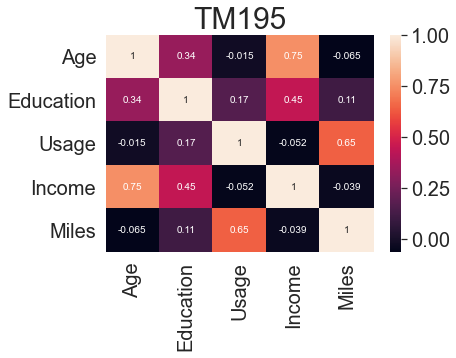

In [27]:
sns.heatmap(data=TM195_df.corr(), annot=True).set(title='TM195')

[Text(0.5, 1.0, 'TM498')]

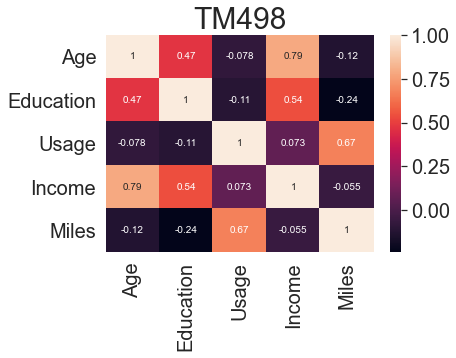

In [28]:
sns.heatmap(data=TM498_df.corr(), annot=True).set(title='TM498')

[Text(0.5, 1.0, 'TM798')]

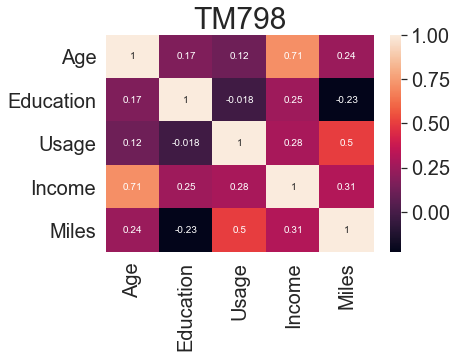

In [29]:
sns.heatmap(data=TM798_df.corr(), annot=True).set(title='TM798')

# Conclusion
Based on the observations from various analysis of the customer characteristics, following profiles can be identified for each product category.


| __Product__ | __Age Rage__ | __Gender__ | __Income Range__ | __Usage__ | __Miles__ |__Marital Status__|__Education__|__Fitness__|
| :---: | :---: | :---: | :---: |:---: | :---: |:---: |:---: |:---: |
| ___TM195___ | 20 to 40 yrs | Any | 30K to 60K | 2 to 4 hrs | 50-100 | Any | 12 to 16 yrs | 2 to 4 |
| ___TM498___ | 20 to 35 yrs | Any | 35K to 60K | 2 to 4 hrs | 50 to 125 | Any | 14 to 16 yrs  | 2 to 4 |
| ___TM798___ | 20 to 30 yrs | Male | 55K and above | 4 to 7 hrs | 100 to 225 | Any | 16 to 20 yrs | 4 to 5 |
